<a href="https://colab.research.google.com/github/L4ncelot1024/Learn_Deep_Learning_Le_Wagon/blob/main/Day3/LiveCode_Financial_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Forecasting

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

## Downloading the data

Here we use the pandas data reader to directly download data from yahoo finance !

In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'AF.PA', 'TOT']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [ ]:
print(AAPL.shape)
AAPL.head()

(254, 6)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-28,79.599998,78.047501,78.150002,79.422501,162234000.0,78.742477
2020-01-29,81.962502,80.345001,81.112503,81.084999,216229200.0,80.390747
2020-01-30,81.022499,79.687500,80.135002,80.967499,126743200.0,80.274246
2020-01-31,80.669998,77.072502,80.232498,77.377502,199588400.0,76.714989
2020-02-03,78.372498,75.555000,76.074997,77.165001,173985600.0,76.504311


In [ ]:
company_list = [globals()[val] for val in tech_list]
#company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, tech_list):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2021-01-14,46.189999,45.439999,45.509998,45.939999,2390800.0,45.939999,TOT
2021-01-15,45.090000,43.980000,45.060001,44.230000,2497400.0,44.230000,TOT
2021-01-19,45.299999,44.709999,45.110001,44.980000,2156100.0,44.980000,TOT
2021-01-20,45.439999,44.939999,45.250000,45.259998,1351300.0,45.259998,TOT
2021-01-21,45.070000,43.790001,45.040001,44.189999,2238700.0,44.189999,TOT
2021-01-22,44.509998,43.459999,43.680000,44.439999,2506100.0,44.439999,TOT
2021-01-25,43.419998,42.549999,43.009998,43.419998,2392200.0,43.419998,TOT
2021-01-26,44.119999,43.380001,43.900002,43.560001,2761100.0,43.560001,TOT
2021-01-27,43.689999,42.250000,42.860001,42.959999,1852100.0,42.959999,TOT


## Looking at the data

In [ ]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-01-28,79.599998,78.047501,78.150002,79.422501,162234000.0,78.742477,APPLE
2020-01-29,81.962502,80.345001,81.112503,81.084999,216229200.0,80.390747,APPLE
2020-01-30,81.022499,79.687500,80.135002,80.967499,126743200.0,80.274246,APPLE
2020-01-31,80.669998,77.072502,80.232498,77.377502,199588400.0,76.714989,APPLE
2020-02-03,78.372498,75.555000,76.074997,77.165001,173985600.0,76.504311,APPLE


In [ ]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,100.458775,97.531284,98.981314,99.062263,1.563496e+08,98.803615
std,23.431552,22.919825,23.333744,23.178489,7.047478e+07,23.321588
min,57.125000,53.152500,57.020000,56.092499,4.669130e+07,55.744217
25%,79.807503,78.047501,78.827499,78.752502,1.062438e+08,78.475372
50%,99.247498,96.489998,97.264999,97.272499,1.375224e+08,96.930199
75%,119.669998,116.449997,118.610001,118.639999,1.875728e+08,118.639999
max,145.089996,141.369995,143.600006,143.160004,4.268848e+08,143.160004


In [ ]:
print(AAPL.index.min())
print(AAPL.index.max())

2020-01-28 00:00:00
2021-01-27 00:00:00


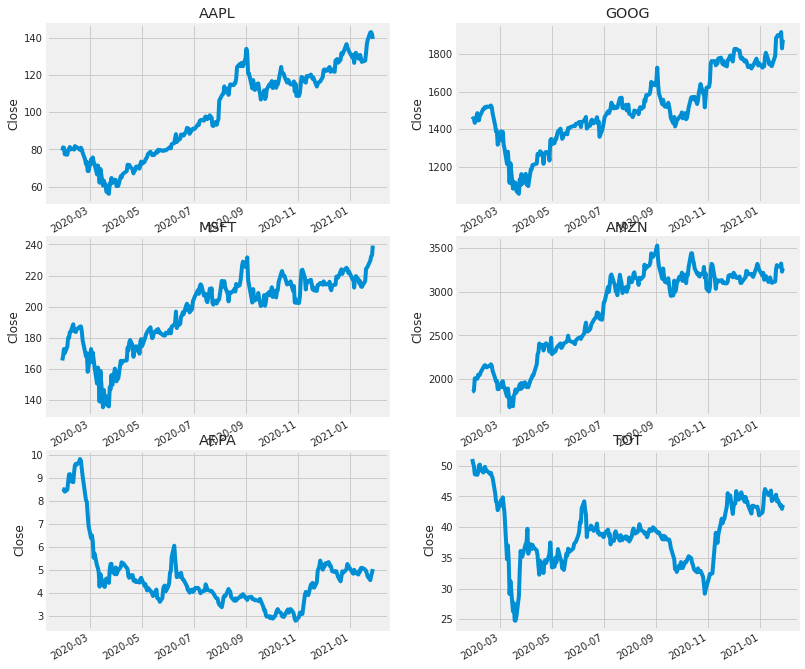

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

## Baseline

How does the moving average compare with the data?

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()

In [ ]:
company.tail()

,High,Low,Open,Close,Volume,Adj Close,company_name,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,,
2021-01-22,44.509998,43.459999,43.680000,44.439999,2506100.0,44.439999,TOT,45.092999,44.327999,43.467400
2021-01-25,43.419998,42.549999,43.009998,43.419998,2392200.0,43.419998,TOT,44.844999,44.325999,43.554399
2021-01-26,44.119999,43.380001,43.900002,43.560001,2761100.0,43.560001,TOT,44.679999,44.331000,43.663600
2021-01-27,43.689999,42.250000,42.860001,42.959999,1852100.0,42.959999,TOT,44.456999,44.317999,43.774400
2021-01-28,43.895000,43.279999,43.360001,43.590000,593489.0,43.590000,TOT,44.256999,44.331499,43.870200


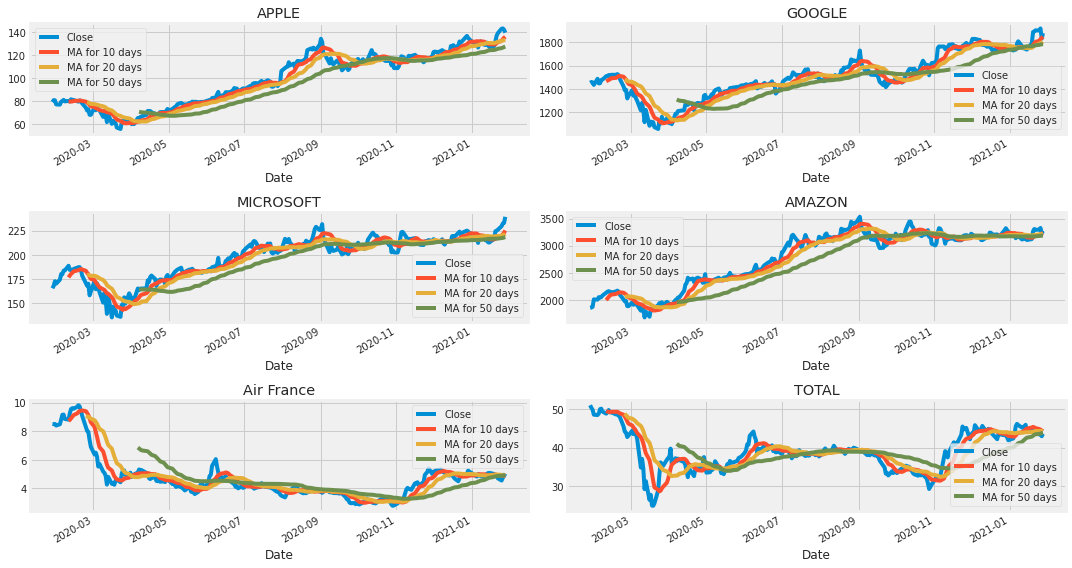

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

globals()['AF.PA'][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('Air France')

TOT[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('TOTAL')

fig.tight_layout()

## Predicting the closing price

Let's try to predict the closing price of Apple !

In [ ]:
df = AAPL
df.tail()

,High,Low,Open,Close,Volume,Adj Close,company_name,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,,
2021-01-22,139.850006,135.020004,136.279999,139.070007,113907200.0,139.070007,AAPL,131.257001,131.570501,125.584400
2021-01-25,145.089996,136.539993,143.070007,142.919998,157611700.0,142.919998,AAPL,132.344000,132.168500,126.123400
2021-01-26,144.300003,141.369995,143.600006,143.160004,98390600.0,143.160004,AAPL,133.762001,132.728000,126.596800
2021-01-27,144.300003,140.410004,143.429993,142.059998,139236700.0,142.059998,AAPL,135.088000,132.996500,127.053800
2021-01-28,140.338501,138.000000,139.520004,139.460098,51550322.0,139.460098,AAPL,135.945010,133.226005,127.457802


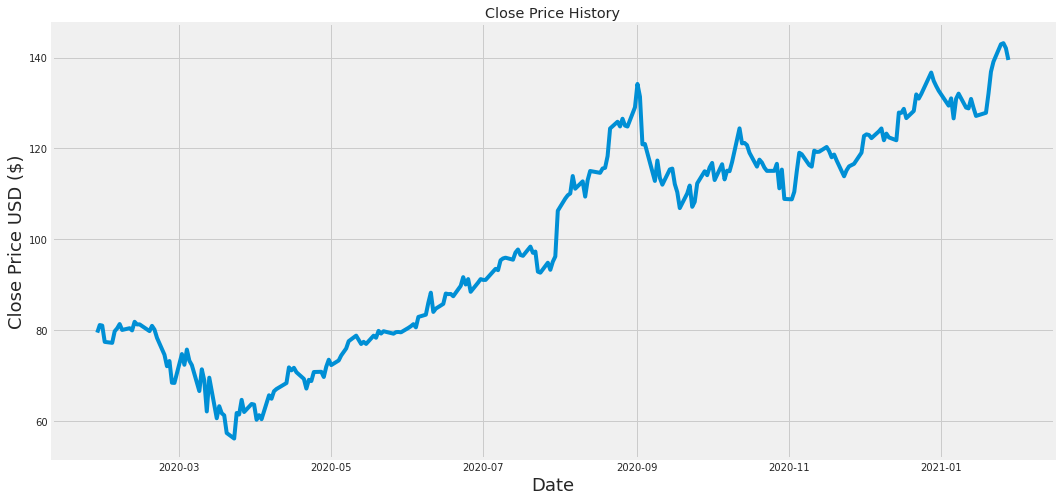

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# We gather the feature column (the last one is our target column)
data = df[['High', 'Low', 'Open', 'Volume', 'Close']]
# Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on, we split on 80% of the data and 
# in the order
training_data_len = int(np.ceil( len(dataset) * .8 ))

In [ ]:
dataset.shape

(254, 5)

### Scaling the data

In [ ]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(dataset[:training_data_len])
scaled_data = scaler.transform(dataset)

print(scaled_data.shape)

training_dataset = scaled_data[:training_data_len]

print(training_dataset.shape)

(254, 5)
(204, 5)


In [ ]:
dataset[:training_data_len].shape

(204, 5)

### Create the input and label data

In [ ]:
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

seq_length = 60

for i in range(seq_length, len(training_dataset)):
    x_train.append(training_dataset[i-seq_length:i, :])
    y_train.append(training_dataset[i, -1]) # close is the last element
        
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], -1))
print(x_train.shape)
print(y_train.shape)

(144, 60, 5)
(144,)


In [ ]:
#Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
# here we don't use the scaled data since we want to compute the real rmse
y_test = dataset[training_data_len:, -1]
for i in range(seq_length, len(test_data)):
    x_test.append(test_data[i-seq_length:i, :])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], -1))

print(x_test.shape)
print(y_test.shape)

(50, 60, 5)
(50,)


In [ ]:
y_test[0]

120.30000305175781

### Build and Train the Model

In [ ]:
print(x_train.shape)
print(y_train.shape)

(144, 60, 5)
(144,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, TimeDistributed

#Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
history = model.fit(x_train, y_train, batch_size=8, epochs=10)

Epoch 1/10
18/18 [==============================] - 3s 53ms/step - loss: 0.1105
Epoch 2/10
18/18 [==============================] - 1s 52ms/step - loss: 0.0066
Epoch 3/10
18/18 [==============================] - 1s 52ms/step - loss: 0.0039
Epoch 4/10
18/18 [==============================] - 1s 52ms/step - loss: 0.0040
Epoch 5/10
18/18 [==============================] - 1s 52ms/step - loss: 0.0036
Epoch 6/10
18/18 [==============================] - 1s 52ms/step - loss: 0.0036
Epoch 7/10
18/18 [==============================] - 1s 51ms/step - loss: 0.0034
Epoch 8/10
18/18 [==============================] - 1s 52ms/step - loss: 0.0049
Epoch 9/10
18/18 [==============================] - 1s 51ms/step - loss: 0.0039
Epoch 10/10
18/18 [==============================] - 1s 54ms/step - loss: 0.0029


In [ ]:
y_train.shape

(144,)

### Evaluate the Model

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5.580114190219592

In [ ]:
predictions = model.predict(x_test)
print(predictions.shape)
# we need to format the predictions for the standard scaler
pred_reshaped = np.concatenate((np.ones((len(predictions), 4)), predictions), 1)
print(pred_reshaped.shape)
pred_reshaped = scaler.inverse_transform(pred_reshaped)
predictions = pred_reshaped[:, -1]

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

(50, 1)
(50, 5)


6.583302872855398

In [ ]:
# We compute the predictions of the baseline model here
for ma_ in ma_day:
  predictions_baseline = df[-50:][f'MA for {ma_} days'].values

  rmse_baseline = np.sqrt(np.mean(((predictions_baseline - y_test) ** 2)))
  print(rmse_baseline)

9.438514691812589
9.884367098669578
10.81920677499274


In [ ]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5.580114190219592

In [ ]:
print(x_test.shape)

(50, 60, 1)


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.



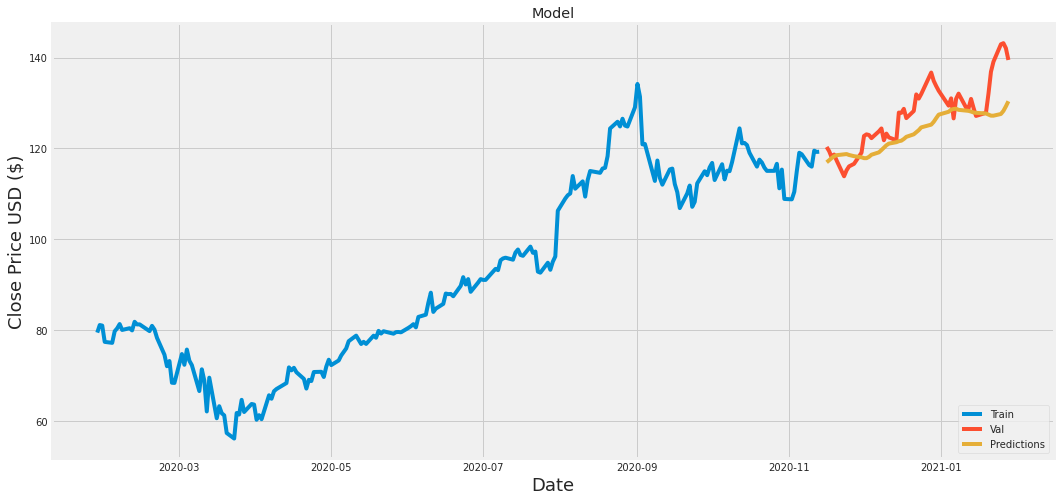

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

### Compare with Neural Prophet

In [ ]:
#!git clone https://github.com/ourownstory/neural_prophet.git

In [ ]:
#!cd neural_prophet

In [ ]:
!pip install neural_prophet/.[live]

Processing ./neural_prophet
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for neuralprophet: filename=neuralprophet-0.2.8-cp36-none-any.whl size=56717 sha256=fb8d2d7aae57d6d7a1d835a84fac47350c9f407aa2d9fc2e30deb248354696c6
  Stored in directory: /tmp/pip-ephem-wheel-cache-4i2f99p6/wheels/26/77/98/d70fac8410b6690e11c1494913e292e37bd7c619decfdfc6a1
Successfully built neuralprophet
  Found existing installation: neuralprophet 0.2.8
    Uninstalling neuralprophet-0.2.8:
      Successfully uninstalled neuralprophet-0.2.8


In [ ]:
print(data.shape)
data.head()

(253, 1)


,Close
Date,
2020-01-28,79.422501
2020-01-29,81.084999
2020-01-30,80.967499
2020-01-31,77.377502
2020-02-03,77.165001


In [ ]:
raw_training_df = data[:training_data_len]
print(raw_training_df.shape)
np_training_df = raw_training_df.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
np_training_df.head()

(203, 1)


,ds,y
0,2020-01-28,79.422501
1,2020-01-29,81.084999
2,2020-01-30,80.967499
3,2020-01-31,77.377502
4,2020-02-03,77.165001


In [ ]:
from neuralprophet import NeuralProphet

m = NeuralProphet()
metrics = m.fit(np_training_df, freq='D')

INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 157
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/100 [00:00<?, ?it/s]

INFO - (NP.forecaster._lr_range_test) - learning rate range test found optimal lr: 1.23E-01
Epoch[157/157]: 100%|██████████| 157/157 [00:07<00:00, 21.26it/s, SmoothL1Loss=0.0019, MAE=3.36, RegLoss=0]


In [ ]:
np_training_df.head()

,ds,y
0,2020-01-28,79.422501
1,2020-01-29,81.084999
2,2020-01-30,80.967499
3,2020-01-31,77.377502
4,2020-02-03,77.165001


In [ ]:
np_valid_df.head()

,ds,y
0,2020-11-13,119.260002
1,2020-11-16,120.300003
2,2020-11-17,119.389999
3,2020-11-18,118.029999
4,2020-11-19,118.639999


In [ ]:
future.head()

,ds,y,t,y_scaled
0,2021-01-28,None,1.266436,NaN


In [ ]:
print(data.shape)
np_data = data.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
np_data.head()

(253, 1)


,ds,y
0,2020-01-28,79.422501
1,2020-01-29,81.084999
2,2020-01-30,80.967499
3,2020-01-31,77.377502
4,2020-02-03,77.165001


INFO - (NP.forecaster._handle_missing_data) - 87 missing dates added.
INFO - (NP.forecaster._handle_missing_data) - 87 NaN values in column y were auto-imputed.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

Epoch[100/100]: 100%|██████████| 100/100 [00:05<00:00, 17.14it/s, SmoothL1Loss=0.000495, MAE=1.89, RegLoss=0]
WARNING - (NP.forecaster.make_future_dataframe) - Insufficient data for 253 historic forecasts, reduced to 193.
INFO - (NP.forecaster._handle_missing_data) - 113 missing dates added.
INFO - (NP.forecaster._handle_missing_data) - 113 NaN values in column y were auto-imputed.


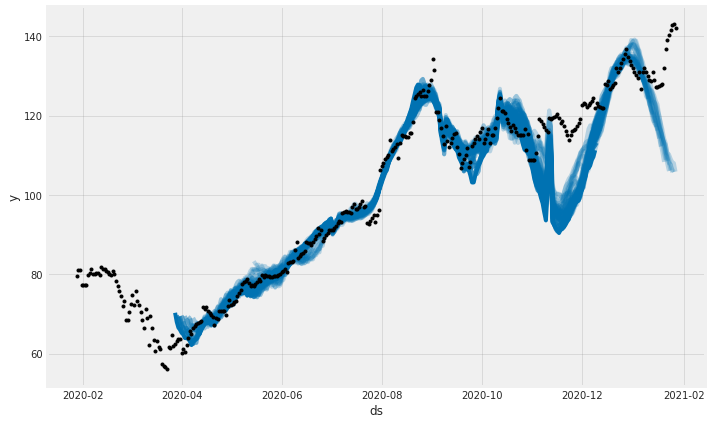

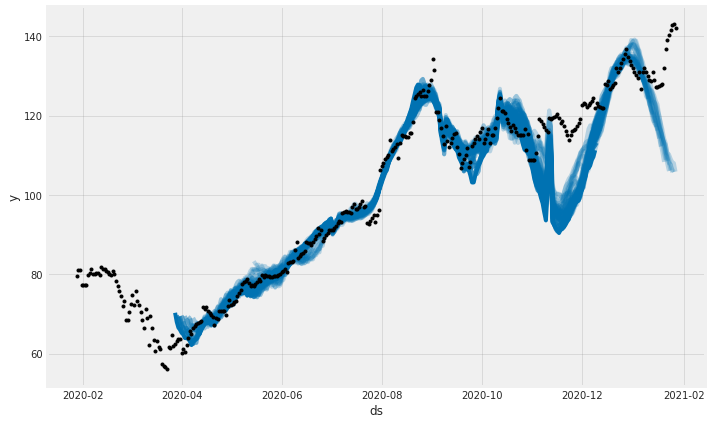

In [ ]:
model_complex = NeuralProphet(
    n_forecasts=50,
    n_lags=60, # how many days we use for the prediction
    n_changepoints=100,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    batch_size=16,
    epochs=100,
    learning_rate=1.0,
)
model_complex = model_complex.add_country_holidays("US", mode="additive", lower_window=-1, upper_window=1)
metrics = model_complex.fit(np_training_df, freq='D')

# Here we use the entire dataset to plot prediction
all_data = model_complex.make_future_dataframe(np_data, 
                                      periods=0, 
                                      n_historic_predictions=len(np_data))
forecast = model_complex.predict(all_data)

model_complex.plot(forecast)

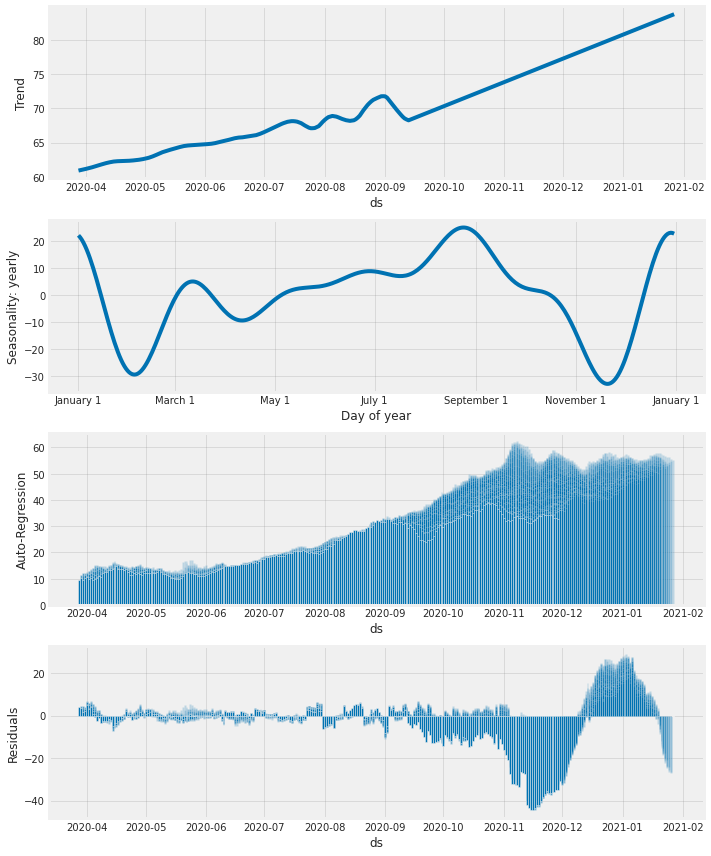

In [ ]:
neural_figure_trend = model_complex.plot_components(forecast, residuals=True)
